## 타이타닉 데이터셋 시각화

* survived: 생존 여부를 나타내며, 0은 사망, 1은 생존을 의미합니다.
* pclass: 티켓 클래스를 나타내며, 1은 1등석, 2는 2등석, 3은 3등석을 의미합니다.
* sex: 승객의 성별을 나타냅니다.
* age: 승객의 나이입니다. 일부는 추정치일 수 있습니다.
* sibsp: 함께 탑승한 형제자매 또는 배우자의 수입니다.
* parch: 함께 탑승한 부모 또는 자녀의 수입니다.
* fare: 티켓 요금입니다.
* embarked: 승선한 항구를 나타냅니다. C는 셰르부르, Q는 퀸즈타운, S는 사우샘프턴입니다.
* class: 티켓의 클래스를 카테고리 형식으로 나타냅니다. pclass와 동일한 정보를 카테고리 형태로 제공합니다.
* who: 승객을 'man', 'woman', 'child'로 분류한 데이터입니다.
* adult_male: 성인 남성인지 여부를 나타내는 불리언 값입니다.
* deck: 객실이 위치한 데크(갑판)를 나타내며, 일부 확장된 데이터셋에만 포함된 정보입니다.
* embark_town: 승선한 항구의 이름입니다. embarked 컬럼의 정보를 문자열로 제공합니다.
* alive: 생존 여부를 'yes', 'no'로 나타낸 데이터입니다. survived 컬럼과 동일한 정보를 문자열로 제공합니다.
* alone: 승객이 혼자 탑승했는지 여부를 나타내는 불리언 값입니다. sibsp와 parch의 합이 0이면 True, 그렇지 않으면 False입니다.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
sns.__version__
!pip list show

Package                           Version
--------------------------------- ---------------
absl-py                           2.1.0
aiobotocore                       2.5.0
aiofiles                          22.1.0
aiohttp                           3.8.5
aioitertools                      0.7.1
aiosignal                         1.2.0
aiosqlite                         0.18.0
alabaster                         0.7.12
anaconda-anon-usage               0.4.2
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.1
anaconda-cloud-auth               0.1.3
anaconda-navigator                2.5.3
anaconda-project                  0.11.1
anyio                             3.5.0
appdirs                           1.4.4
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.1
asttokens                         2.0.5
astunparse            

In [23]:
# 폰트설정
plt.rc("font", family='Malgun Gothic')

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

In [3]:
titanic = sns.load_dataset('titanic')


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# 생존자와 사망자수
print(titanic['survived'].value_counts())
print(titanic['survived'].value_counts(normalize=True)*100)

survived
0    549
1    342
Name: count, dtype: int64
survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [17]:
# 클래스별 승객 수
print(titanic['class'].unique())
print(titanic['class'].value_counts())
print(titanic['class'].value_counts(normalize=True)*100)

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
class
Third     491
First     216
Second    184
Name: count, dtype: int64
class
Third     55.106622
First     24.242424
Second    20.650954
Name: proportion, dtype: float64


In [19]:
# 성별 생존율
titanic.groupby('sex')['survived'].mean()*100

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

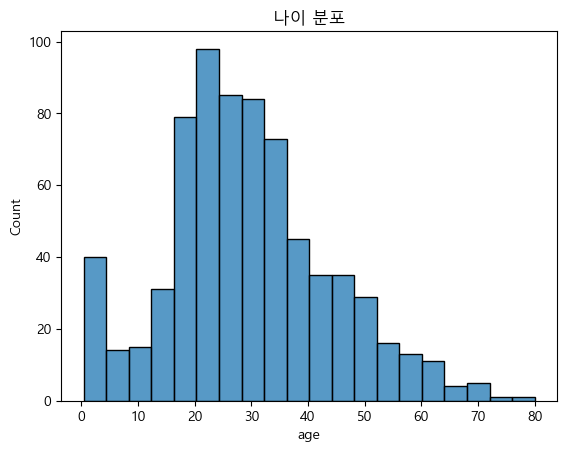

In [27]:
# 나이분포
sns.histplot(titanic['age'],bins=20)
plt.title('나이 분포')
plt.show()

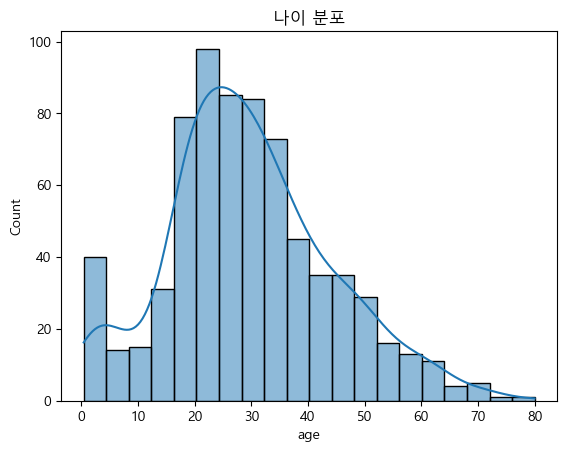

In [29]:
# 나이분포
sns.histplot(titanic['age'], bins=20, kde=True)
plt.title('나이 분포')
plt.show()

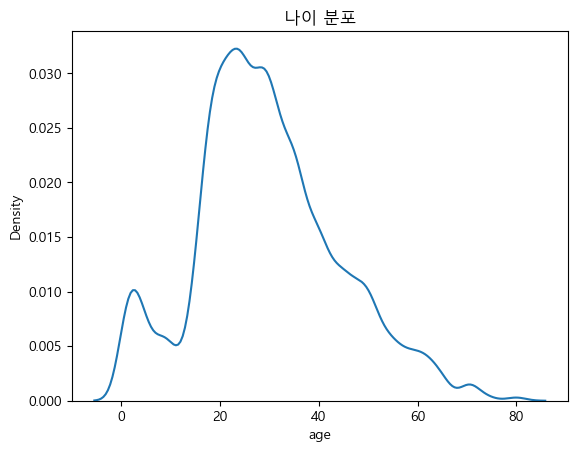

In [39]:
# 케이텐스 플롯
# bw_adjust : 수치가 적을수록 거칠게, 클수록 완만하게 표현
sns.kdeplot(data=titanic['age'],bw_adjust=0.5)
plt.title('나이 분포')
plt.show()


In [40]:
# 클래스별 평균 운임
titanic.groupby('class')['fare'].mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [42]:
# 승객나이의 중앙값과 평균
print(titanic['age'].mean())
print(titanic['age'].median())

29.69911764705882
28.0


In [43]:
# 가장 높은 운임을 낸 승객 정보
titanic[titanic['fare'] == titanic['fare'].max()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


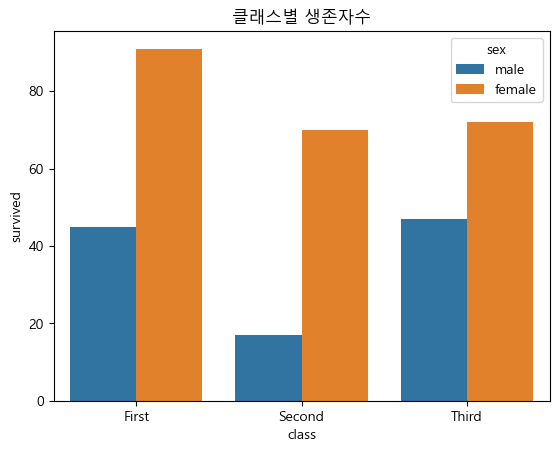

In [57]:
# 막대 그래프
# 각 클래스별 생존자수
sns.barplot(data=titanic, x='class',y='survived',estimator='sum', errorbar=None, hue='sex', )
plt.title('클래스별 생존자수')
plt.show()

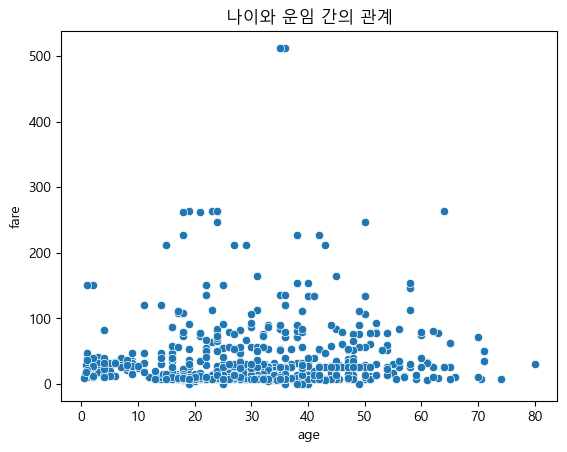

In [61]:
# 산점도 그래프
# 나이와 운임간의 관계표현
titanic[['age','fare']].corr()

sns.scatterplot(titanic,x='age',y='fare')
plt.title('나이와 운임 간의 관계')
plt.show()

In [64]:
titanic.select_dtypes(np.number).corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


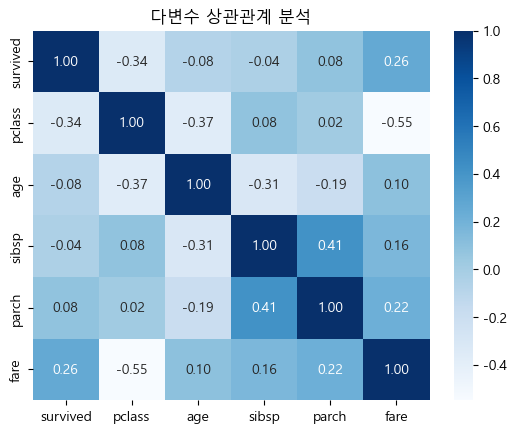

In [106]:
# 히트맵 : 다변수 상관관계 분석
sns.heatmap(titanic.select_dtypes(np.number).corr(),annot=True,cmap='Blues',fmt='.2f')
plt.title('다변수 상관관계 분석')
plt.show()

<Axes: xlabel='class', ylabel='fare'>

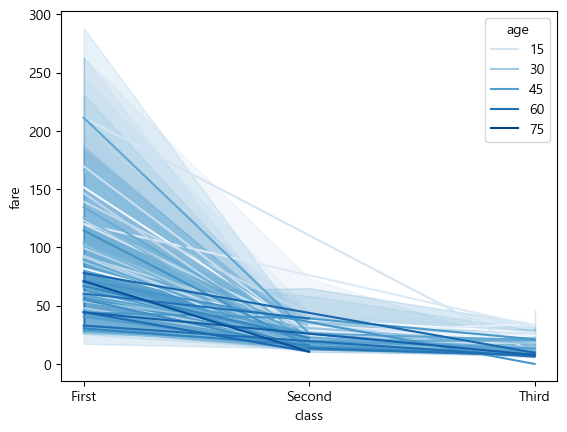

In [80]:
# 라인 그래프
# 각 클래스에 따른 운임의 평균
sns.lineplot(titanic,x='class',y='fare', estimator='mean', hue='age', palette='Blues')

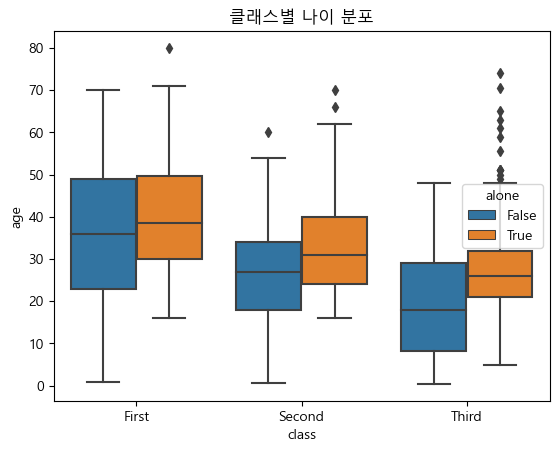

In [95]:
# 박스 플롯
# 각 클래스에 따른 나이 분포
sns.boxplot(titanic, x='class',y='age', hue='alone')
plt.title('클래스별 나이 분포')
plt.show()

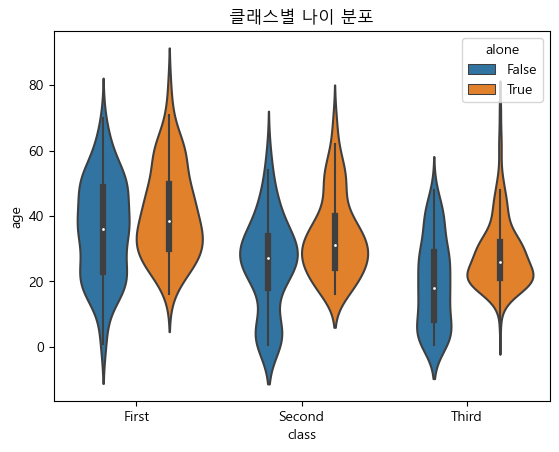

In [96]:
# 바이올린 플롯
# 각 클래스에 따른 나이 분포
sns.violinplot(titanic, x='class',y='age', hue='alone')
plt.title('클래스별 나이 분포')
plt.show()

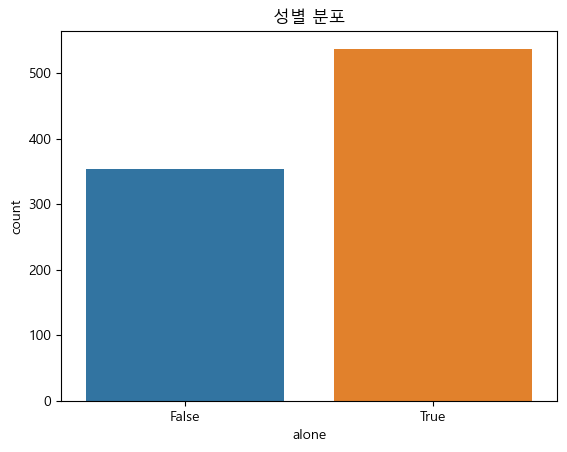

In [101]:
# 카운트 플롯
# 탑승객 성별 분포
sns.countplot(titanic, x='alone')
plt.title('성별 분포')
plt.show()

d:\kdt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


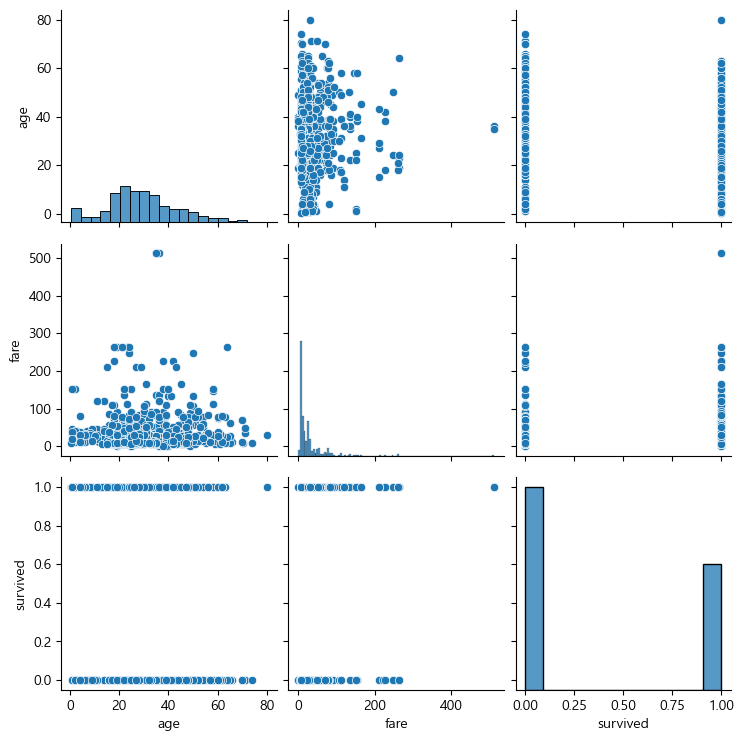

In [112]:
# 페어 플롯
# age, fare, survied 변수간의 관계 표현
sns.pairplot(titanic[['age','fare','survived']])
plt.subplots_adjust(hspace=.1)
plt.show()

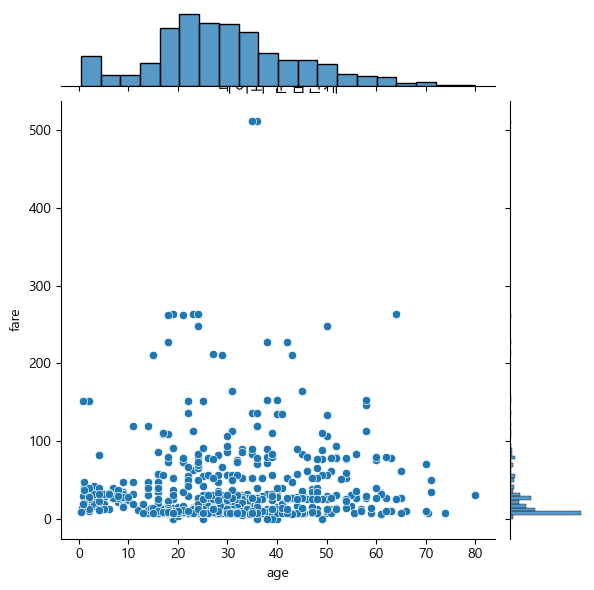

In [113]:
# 조인트 플롯 (scatterplot-흩어진정도 + histplot-밀집구간)
# 나이(age)와 운임(fare) 관계 표현
sns.jointplot(titanic, x='age', y='fare')
plt.title('나이와 운임관계')
plt.show()

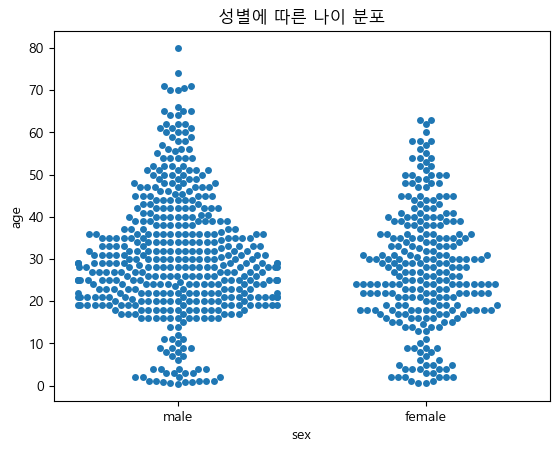

In [114]:
# 스웜 플롯(1. 데이터포인트 중복 방지, 정량적 정보표현, 데이터 밀집도표현)
# 성별(sex)에 따른 나이(age) 분포
sns.swarmplot(titanic, x='sex', y='age')
plt.title('성별에 따른 나이 분포')
plt.show()

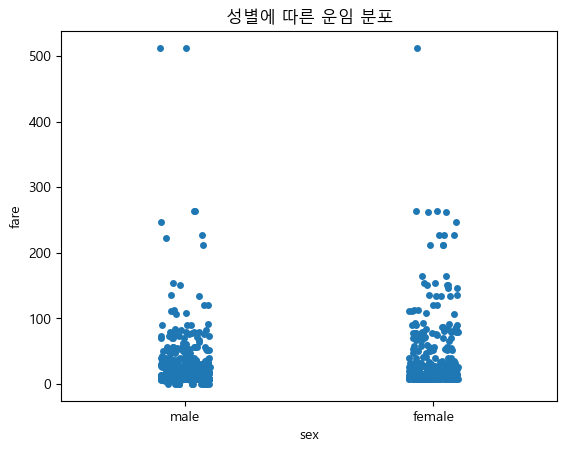

In [119]:
# 스트립 플롯(1. 개별 데이터 포인트 표시 2. 범주형 데이터 시각화 3.데이터 중복 표현-동일값은 겹쳐서 표시)
# 성별에 따른 운임 분포
# jitter : 데이터 포인트들 사이의 겹침을 줄이기 위해 사용함,  데이터 포인트가 많을때 사용
sns.stripplot(titanic, x='sex', y='fare', jitter=True)
plt.title('성별에 따른 운임 분포')
plt.show()

d:\kdt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


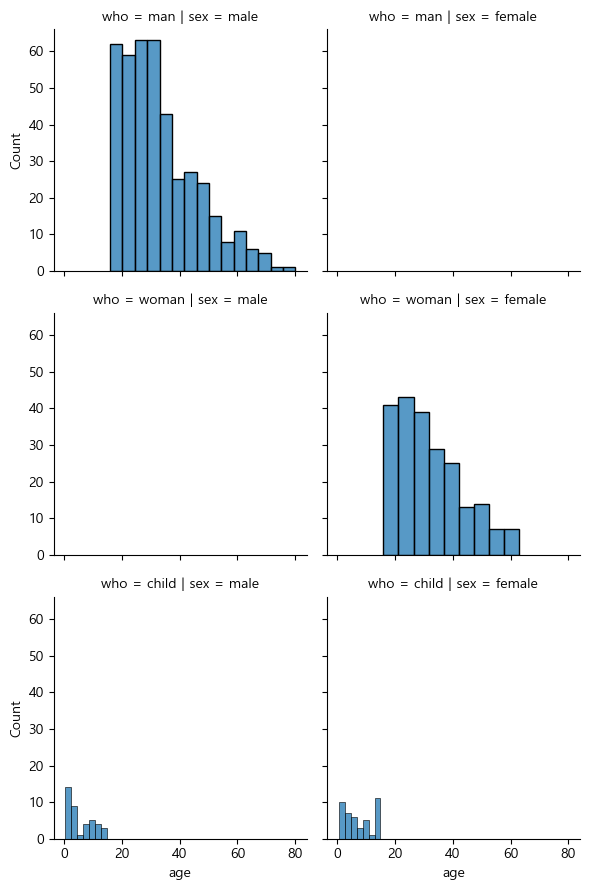

In [128]:
# 팩트 그리드 (1. 다변량 데이터 시각화 2. 조건부 플로팅)
# 생존여부(survived)에 따른 나이(Age) 분포
g = sns.FacetGrid(titanic, col='sex', row='who')
g.map(sns.histplot, 'age')
plt.show()

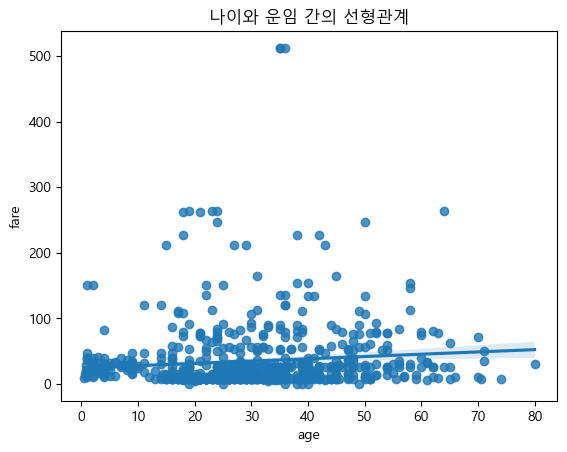

In [129]:
# 레크 플롯
# 나이와 운임간의 선형관계 표현
sns.regplot(titanic, x='age',y='fare')
plt.title('나이와 운임 간의 선형관계')
plt.show()